### **Athena Queries**

#### **Restaurant Table Creation**

In [1]:
'''CREATE EXTERNAL TABLE IF NOT EXISTS food.restaurants_cleaned (
    id INT,
    position INT,
    name STRING,
    category STRING,
    price_range INT,
    lat DOUBLE,
    lng DOUBLE
)
STORED AS PARQUET
LOCATION 's3://bucket-akshat-test/cleaned/restaurants/';
'''

"CREATE EXTERNAL TABLE IF NOT EXISTS food.restaurants_cleaned (\n    id INT,\n    position INT,\n    name STRING,\n    category STRING,\n    price_range INT,\n    lat DOUBLE,\n    lng DOUBLE\n)\nSTORED AS PARQUET\nLOCATION 's3://bucket-akshat-test/cleaned/restaurants/';\n"

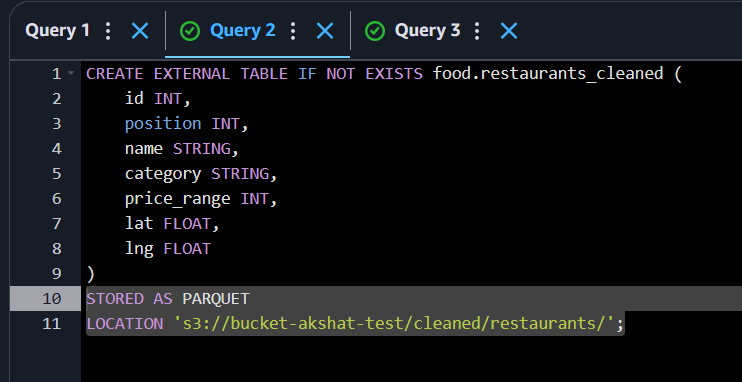

#### **Menu Table Creation**

In [2]:
'''CREATE EXTERNAL TABLE IF NOT EXISTS food.menus_cleaned (
    restaurant_id INT,
    category STRING,
    name STRING,
    price DOUBLE
)
STORED AS PARQUET
LOCATION 's3://bucket-akshat-test/cleaned/menus/';
'''

"CREATE EXTERNAL TABLE IF NOT EXISTS food.menus_cleaned (\n    restaurant_id INT,\n    category STRING,\n    name STRING,\n    price DOUBLE\n)\nSTORED AS PARQUET\nLOCATION 's3://bucket-akshat-test/cleaned/menus/';\n"

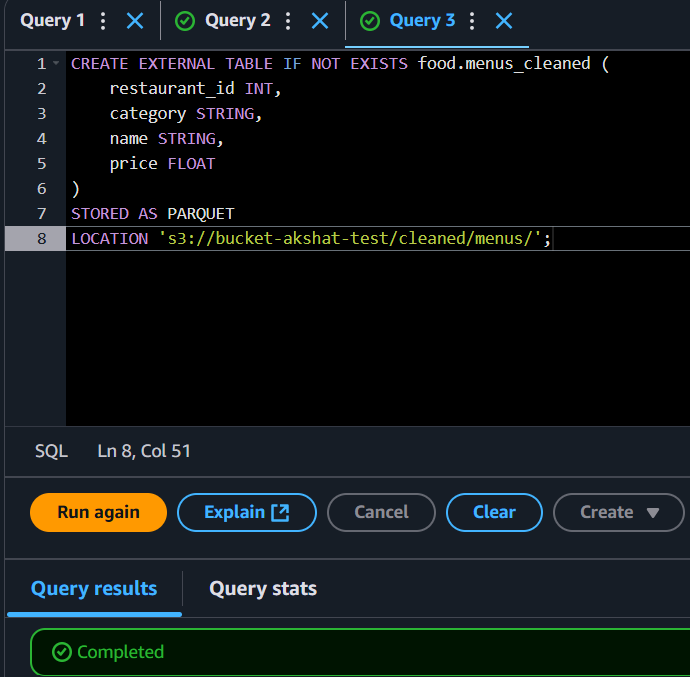

#### **Sample Run**

In [3]:
'''SELECT * 
FROM restaurants_cleaned 
LIMIT 10;
'''

'SELECT * \nFROM restaurants_cleaned \nLIMIT 10;\n'

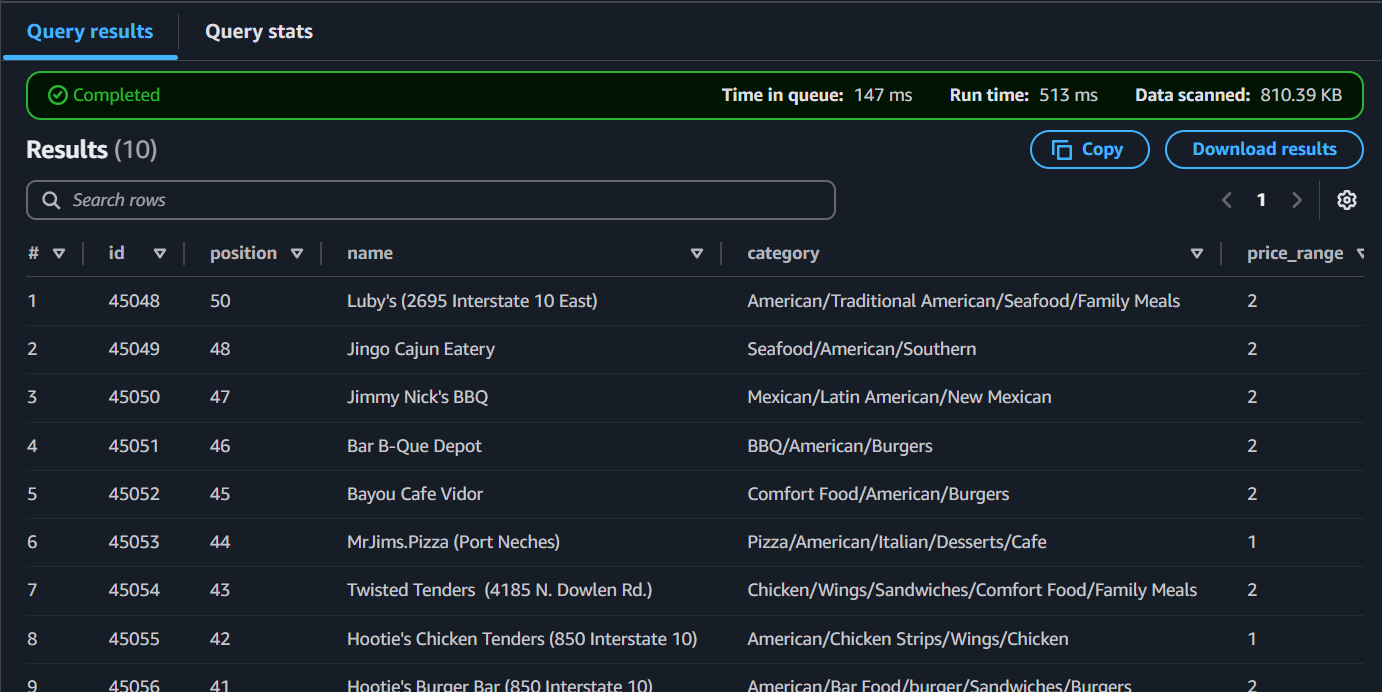

In [4]:
'''SELECT * 
FROM menus_cleaned 
LIMIT 10;
'''

'SELECT * \nFROM menus_cleaned \nLIMIT 10;\n'

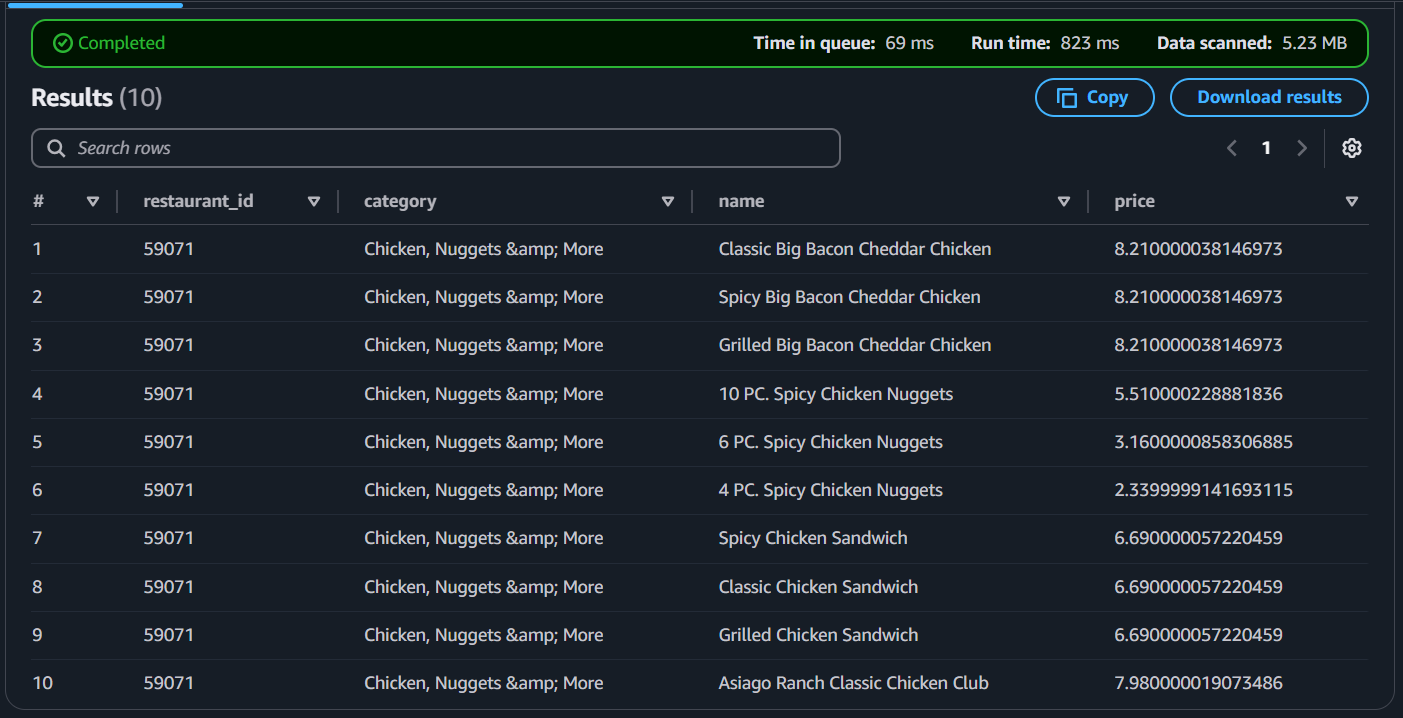

#### **Aggregation & Joining**

In [5]:
'''CREATE TABLE restaurants_final
WITH (
  format = 'PARQUET',
  external_location = 's3://bucket-akshat-test/restaurants_final/'
) AS
SELECT r.id, r.name, AVG(m.price) AS avg_menu_price, COUNT(DISTINCT m.category) AS unique_menu_categories
FROM restaurants_cleaned r
JOIN menus_cleaned m
ON r.id = m.restaurant_id
GROUP BY r.id, r.name;
'''

"CREATE TABLE restaurants_final\nWITH (\n  format = 'PARQUET',\n  external_location = 's3://bucket-akshat-test/restaurants_final/'\n) AS\nSELECT r.id, r.name, AVG(m.price) AS avg_menu_price, COUNT(DISTINCT m.category) AS unique_menu_categories\nFROM restaurants_cleaned r\nJOIN menus_cleaned m\nON r.id = m.restaurant_id\nGROUP BY r.id, r.name;\n"

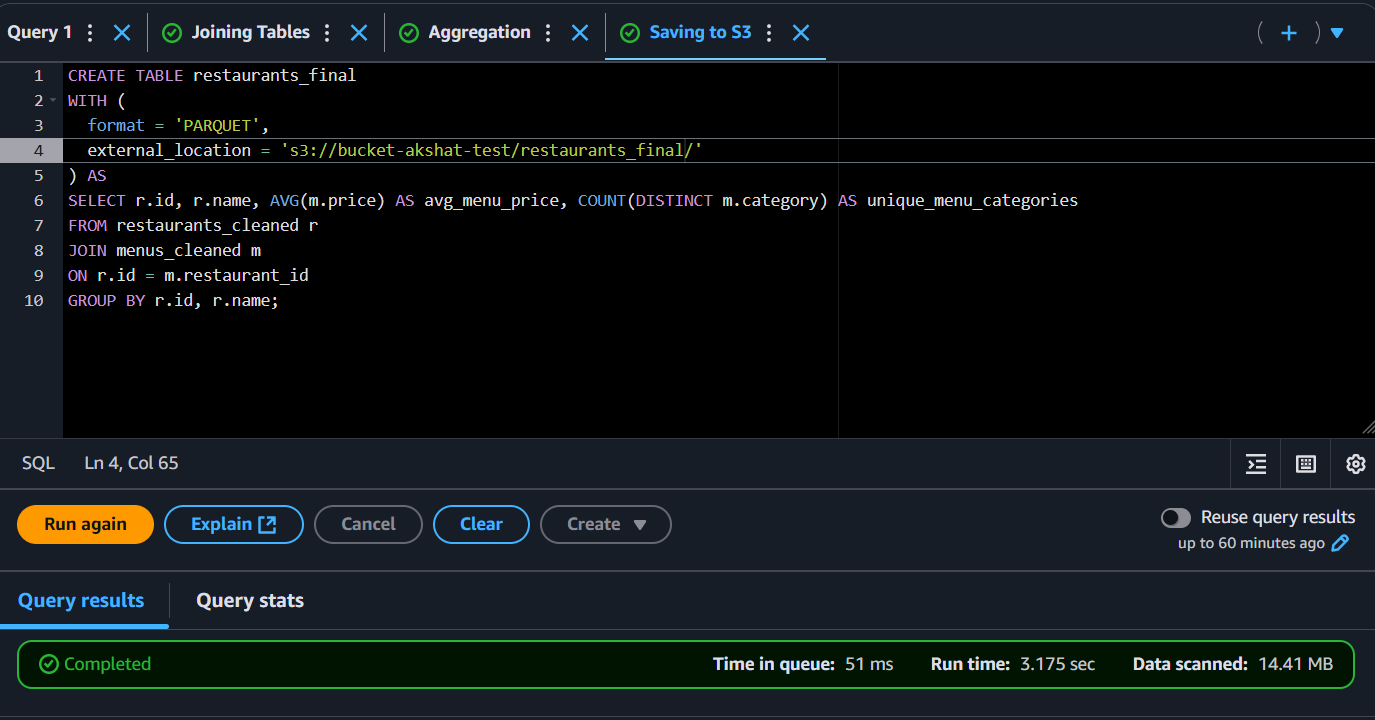